In [1]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read and Merge Dengue Data
# loading do CSV de features e labels e merge dos dados:
# loading do CSV de features e labels e merge dos dados:
df_features = pd.read_csv("dados/dengue_features_train.csv", na_values=[" ","...","na","NA","nan","Na"])
df_labels = pd.read_csv("dados/dengue_labels_train.csv",na_values=[" ","...","na","NA","nan","Na"])
df_dengue = pd.merge(df_features,df_labels)
df_dengue

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [3]:
### Contando dados nulos:
df_dengue.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [4]:
### Suprimindo as colunas que identificam nomes, períodos ou ciclos da tabela de treino e teste.
df_dengue = df_dengue[['city',"year",'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases']]


In [5]:
#### Converting categorical city to once_hot_encoder and merge again with df
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown="ignore")
cities = pd.DataFrame(enc.fit_transform(df_dengue[["city"]]).toarray(), columns=[["iq", "sj"]])
df_dengue = pd.merge(cities, df_dengue, left_index=True ,right_index=True)
df_dengue.drop(columns="city", inplace=True)

In [6]:
### Rename colums names
df_dengue.rename(columns= {('iq',):"iq", ('sj',) :"sj"}, inplace=True)

In [7]:
df_dengue

,iq,sj,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,0.0,1.0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,0.0,1.0,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,0.0,1.0,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,0.0,1.0,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,0.0,1.0,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1.0,0.0,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,1.0,0.0,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,1.0,0.0,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,1.0,0.0,2010,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [8]:
#### Change Nan values by mean (train input)
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
df_dengue_clean = imp.fit(df_dengue).transform(df_dengue)
df_dengue_clean = pd.DataFrame(df_dengue_clean)
df_dengue_clean

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,1.0,1990.0,18.0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,0.0,1.0,1990.0,19.0,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,0.0,1.0,1990.0,20.0,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,0.0,1.0,1990.0,21.0,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,0.0,1.0,1990.0,22.0,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1.0,0.0,2010.0,21.0,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5.0
1452,1.0,0.0,2010.0,22.0,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8.0
1453,1.0,0.0,2010.0,23.0,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1.0
1454,1.0,0.0,2010.0,24.0,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1.0


In [9]:
%%html
<h2 align="center"> 1 - Treinando  modelo de ML, com a variável "city", one encoder - Regressão linear </h2>

In [10]:
# SPLIT dos dados - training and test
from sklearn.model_selection import train_test_split
y = df_dengue_clean[24]
X = df_dengue_clean.drop(columns=24, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
y, X

(0       4.0
 1       5.0
 2       4.0
 3       3.0
 4       6.0
        ... 
 1451    5.0
 1452    8.0
 1453    1.0
 1454    1.0
 1455    4.0
 Name: 24, Length: 1456, dtype: float64,
        0    1       2     3         4         5         6         7      8   \
 0     0.0  1.0  1990.0  18.0  0.122600  0.103725  0.198483  0.177617  12.42   
 1     0.0  1.0  1990.0  19.0  0.169900  0.142175  0.162357  0.155486  22.82   
 2     0.0  1.0  1990.0  20.0  0.032250  0.172967  0.157200  0.170843  34.54   
 3     0.0  1.0  1990.0  21.0  0.128633  0.245067  0.227557  0.235886  15.36   
 4     0.0  1.0  1990.0  22.0  0.196200  0.262200  0.251200  0.247340   7.52   
 ...   ...  ...     ...   ...       ...       ...       ...       ...    ...   
 1451  1.0  0.0  2010.0  21.0  0.342750  0.318900  0.256343  0.292514  55.30   
 1452  1.0  0.0  2010.0  22.0  0.160157  0.160371  0.136043  0.225657  86.47   
 1453  1.0  0.0  2010.0  23.0  0.247057  0.146057  0.250357  0.233714  58.94   
 1454  1.0  0.0 

In [12]:
## Training a model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [13]:
lm.score(X_test,y_test)
#### Modelo com baixíssima qualidade de Score para regressão Linear

0.17525441632504257

In [14]:
%%html
<h2 align center> Score R2 do primeiro modelo de ML = 0.175

In [15]:
%%html
<h2 align="center"> 2 - No segundo modelo - vamos normalizar os valores de X, antes do split. </h2>

In [16]:
# Normalize X values
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(X)
X_norm = scaler.transform(X)
X_norm

array([[0.00000000e+00, 4.76206561e-04, 9.47651056e-01, ...,
        1.40004729e-02, 9.52413122e-03, 7.61930497e-03],
       [0.00000000e+00, 4.76018955e-04, 9.47277720e-01, ...,
        1.50898009e-02, 1.05676208e-02, 4.09376301e-03],
       [0.00000000e+00, 4.75695395e-04, 9.46633836e-01, ...,
        1.53173917e-02, 1.08458550e-02, 1.96937894e-02],
       ...,
       [4.71186924e-04, 0.00000000e+00, 9.47085718e-01, ...,
        1.51722190e-02, 9.04678895e-03, 3.48678324e-03],
       [4.71098864e-04, 0.00000000e+00, 9.46908716e-01, ...,
        1.46982846e-02, 9.89307614e-03, 7.53758182e-03],
       [4.70997405e-04, 0.00000000e+00, 9.46704784e-01, ...,
        1.58726125e-02, 1.04561424e-02, 9.60834706e-03]])

In [17]:
# split data
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

In [18]:
y_train, X_train_norm

(464     22.0
 471     20.0
 1328    26.0
 435     99.0
 1206     0.0
         ... 
 1095     1.0
 1130     3.0
 1294     5.0
 860     20.0
 1126     6.0
 Name: 24, Length: 1019, dtype: float64,
 array([[0.00000000e+00, 4.74150506e-04, 9.47826862e-01, ...,
         1.45090055e-02, 1.02890660e-02, 3.74578900e-03],
        [0.00000000e+00, 4.73789821e-04, 9.47105852e-01, ...,
         1.57772010e-02, 1.10393028e-02, 6.77519444e-03],
        [4.69955564e-04, 0.00000000e+00, 9.43670773e-01, ...,
         1.58844981e-02, 1.02450313e-02, 5.88854322e-02],
        ...,
        [4.71105873e-04, 0.00000000e+00, 9.45509488e-01, ...,
         1.59233785e-02, 1.02229975e-02, 4.07977686e-02],
        [0.00000000e+00, 4.72190233e-04, 9.47213608e-01, ...,
         1.49684304e-02, 1.15214417e-02, 8.49942420e-03],
        [4.70680551e-04, 0.00000000e+00, 9.43243825e-01, ...,
         1.61914110e-02, 9.69601936e-03, 8.89586242e-03]]))

In [19]:
# Train a normalized model
lm = LinearRegression()
lm.fit(X_train_norm,y_train)

LinearRegression()

In [20]:
lm.score(X_test_norm, y_test)

0.17598554069312844

In [21]:
%%html
<h3> Até o momento, houve desconsiderável evolução do modelo linear, devido à baixa linearidade
de correlação entre features e labels </h3>
<h2 align = center> 3 - Implementar a técnica de transformada log do label </h2>

In [22]:
# Transformada em Log do Array
y_arr = np.array(y)
y_log = []
for x in y_arr:
    if x==0:
        y_log.append(x)
    else:
        y_log.append(np.log(x))

In [23]:
### Split dos dados
X_train_norm, X_test_norm, y_log_train, y_log_test = train_test_split(X_norm, y_log, test_size=0.3, random_state=42)

In [24]:
# Train a normalized model and log label
lm = LinearRegression()
lm.fit(X_train,y_log_train)

LinearRegression()

In [25]:
round(lm.score(X_test, y_log_test),2)

0.4

In [26]:
%%html
<h3> Nice ! O modelo progrediu para R2 = 0.4, com a transformação log do label (feature Engineer).

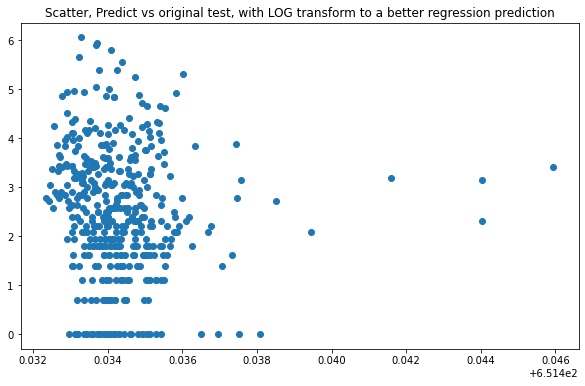

In [27]:
#### Y_test vs Predict - plot
plt.figure(figsize=(10,6))
plt.scatter(lm.predict(X_test_norm), y_log_test)
plt.title("Scatter, Predict vs original test, with LOG transform to a better regression prediction")
plt.show()

In [28]:
%%html
<br><br>
<h2> ANALISAR OS COEFICIENTES DE LINEARIDADE E FAZER O TESTE COM OS MAIS SIGNIFICATIVOS</h2>
<br><br>

In [29]:
### Listando a significancia dos coeficientes para o modelo.
coef = lm.coef_
pd.DataFrame(coef, X.columns)
linear_coef_dict = {"column" : X.columns, "coef" : coef}
linear_coef_log_model = pd.DataFrame(linear_coef_dict).abs().sort_values(by="coef", ascending=False)
linear_coef_log_model

,column,coef
17,17.0,2.248113
11,11.0,1.804889
6,6.0,0.848518
7,7.0,0.611106
0,0.0,0.244524
1,1.0,0.244524
19,19.0,0.204515
9,9.0,0.176241
4,4.0,0.174318
10,10.0,0.119975


In [30]:
%%html
<h2> Para a escolha de um label na escala LOG e com os melhores coeficientes, o modelo linear 
evouliu para um Score R2 = "0,366"

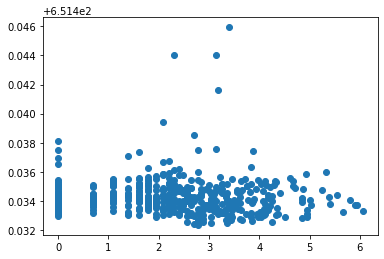

In [31]:
plt.scatter(y_log_test, lm.predict(X_test_norm))

In [32]:
%%html
<h2 align="center"> 5 - Transformações e pipeline Polinomial </h2>

In [35]:
## Testando um modelo de pipeline com X new
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline



In [64]:
df_dengue_clean

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,1.0,1990.0,18.0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,0.0,1.0,1990.0,19.0,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,0.0,1.0,1990.0,20.0,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,0.0,1.0,1990.0,21.0,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,0.0,1.0,1990.0,22.0,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1.0,0.0,2010.0,21.0,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5.0
1452,1.0,0.0,2010.0,22.0,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8.0
1453,1.0,0.0,2010.0,23.0,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1.0
1454,1.0,0.0,2010.0,24.0,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1.0


In [ ]:
%%html
<h2> Testes com Min Max de todos os dados 

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler_min_max = MinMaxScaler(feature_range=(0,1))
df_dengue_scaled = scaler.fit_transform(df_dengue_clean)
df_dengue_scaled = pd.DataFrame(df_dengue_scaled)

In [69]:
y = df_dengue_scaled[24]
X = df_dengue_scaled.drop(columns=24, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [70]:
lm_scaled = LinearRegression()
lm_scaled.fit(X_train,y_train)

LinearRegression()

In [71]:
lm_scaled.score(X_test, y_test)

0.562319168335186

In [135]:
## polinomial transform - sem normalização.
poly = PolynomialFeatures(3)
df_dengue_scaled_poly = pd.DataFrame(poly.fit_transform(df_dengue_clean))

In [136]:
y = df_dengue_scaled_poly[350]
X = df_dengue_scaled_poly.drop(columns=350, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [137]:
lm_scaled = LinearRegression()
lm_scaled.fit(X_train,y_train)

LinearRegression()

In [138]:
lm_scaled.score(X_test, y_test)

0.9999999686553499

In [140]:
table_compared = pd.DataFrame({"original" : (np.sqrt(lm_scaled.predict(X_test))), "predict" : np.sqrt(y_test)})

<ipython-input-140-4a80b0911901>:1: RuntimeWarning: invalid value encountered in sqrt
  table_compared = pd.DataFrame({"original" : (np.sqrt(lm_scaled.predict(X_test))), "predict" : np.sqrt(y_test)})


In [142]:
table_compared

,original,predict
666,5.998097,6.0
633,2.033779,2.0
161,18.997883,19.0
147,12.998487,13.0
18,24.002967,24.0
...,...,...
558,19.998975,20.0
643,5.998414,6.0
928,0.955758,1.0
1205,NaN,0.0


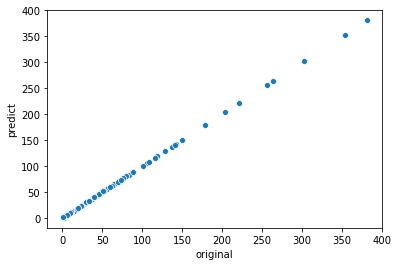

In [145]:
sns.scatterplot(data=table_compared, x="original", y="predict")

In [147]:
%%html
<h1> Observe qu eo modelo acima está enviesado pela transformação polinomial a todas as variáveis </h1>

In [270]:
### Aplicando a transformação polinomial somente à X

In [297]:
y = df_dengue_clean[24]
X = df_dengue_clean.drop(columns=24, axis=1)

In [303]:
X = X[[3]]

In [304]:
#### Aplicando Poly somente à X
poly = PolynomialFeatures(2)
X_poly = pd.DataFrame(poly.fit_transform(X))

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=600)

In [306]:
lm_poly = LinearRegression()
lm_poly.fit(X_train,y_train)

LinearRegression()

In [307]:
lm_poly.score(X_test, y_test)

0.05073208028361409

In [308]:
%%html
<h3> Convertendo y para um valor logaritmo e min max em todo o dataset

In [310]:
y = df_dengue_clean[24]
X = df_dengue_clean.drop(columns=24, axis=1)

In [313]:
# Transformada em Log do Array
y_arr = np.array(y)
y_log = []
for x in y_arr:
    if x==0:
        y_log.append(x)
    else:
        y_log.append(np.log(x))

In [316]:
df_dengue_log = pd.merge(X, pd.DataFrame(y_log), right_index=True, left_index=True)

In [317]:
df_dengue_log

,0_x,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,0_y
0,0.0,1.0,1990.0,18.0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,1.386294
1,0.0,1.0,1990.0,19.0,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,1.609438
2,0.0,1.0,1990.0,20.0,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,1.386294
3,0.0,1.0,1990.0,21.0,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,1.098612
4,0.0,1.0,1990.0,22.0,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1.0,0.0,2010.0,21.0,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,1.609438
1452,1.0,0.0,2010.0,22.0,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,2.079442
1453,1.0,0.0,2010.0,23.0,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,0.000000
1454,1.0,0.0,2010.0,24.0,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,0.000000


In [318]:
from sklearn.preprocessing import MinMaxScaler
scaler_min_max = MinMaxScaler(feature_range=(0,1))
df_dengue_scaled_log = scaler.fit_transform(df_dengue_log)
df_dengue_scaled_log = pd.DataFrame(df_dengue_scaled_log)

In [330]:
y = df_dengue_scaled_log[24]
X = df_dengue_scaled_log.drop(columns=24, axis=1)

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=600)

In [342]:
lm_scaled_log = LinearRegression()
lm_scaled_log.fit(X_train,y_train)

LinearRegression()

In [343]:
lm_scaled_log.score(X_test, y_test)

0.4005935464187349